# 사회적 약자와 관련 시설에 대한 데이터 분석

프로젝트 소개

- 사회를 구성하는 사회적 약자들은 위 그래프와 같이 고령화나 저출산 등을 비롯한 현대의 빠른 인구 변화로 계속해서 그 비중이 변하고 있습니다.
- 이들과 관련된 시설이 전체적으로나 지역적으로 인구 구성에 맞게 구성되었는지 데이터 분석을 통해 확인해보고자 합니다.
- 저희는 사회적 약자를 세 유형으로 구분하였습니다.

1. 신체적∙정신적 장애로 오랫동안 일상생활이나 사회생활에서 상당한 제약을 받는 장애인
2. 6세 미만 아동 또는 보호자가 없는 18세 미만의 보호아동
3. 65세 이상의 노인



### 한글 폰트 설정

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rc('axes', unicode_minus=False)
plt.rcParams['axes.unicode_minus'] = False

## 0. 개요

들어가기에 앞서 현재 대한민국에서 사회적 약자가 차지하는 비중과 현재 시설이 어떻게 구성되어 있는지 알아보겠습니다. 

### 0-1. 지난 10년간 인구 변화 추세선

In [1]:
import csv
import numpy as np

years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

child = []
old = []
handicap = []
all = []

with open('../데이터/1996~2023연령별_인구변화_전체.csv', 'r', encoding='euc-kr') as f:
    data = csv.reader(f)
    next(data)
    
    # 전체 인구 데이터 처리
    for row in data:
        if row[0] == '전국' and row[1] == '계':
            all_change = row[17:]  # 마지막 5년 데이터를 선택
            all.extend(all_change)
            
with open('../데이터/1996~2023연령별_인구변화_전체.csv', 'r', encoding='euc-kr') as f:
    data = csv.reader(f)
    
    # 첫 번째 행(연도), 두 번째 행(합계)은 건너뛰기
    next(data)  # 첫 번째 헤더(연도) 건너뛰기
    next(data)  # 두 번째 행(합계) 건너뛰기
    
    child_change = [row for row in data if row[1] in ['o세', '1세', '2세', '3세','4세','5세']]
    child = [sum(int(row[i]) for row in child_change) for i in range(-11,0)]

# numpy를 사용해서 65세 이상 인구 확인 
data = np.genfromtxt('../데이터/1996~2023연령별_인구변화_전체.csv', delimiter =',', encoding='euc-kr')
col1=data[67:103,-11:,]
col1
col5=data[:7]
old = [sum(int(row[i]) for row in col1) for i in range(-11, 0)]

with open('../데이터/장애인_인구_시군구별.csv', 'r', encoding='euc-kr') as f:
    data = csv.reader(f)

    next(data)

    for row in data:
        if row[0] == '전국':
            handicap_change = row[7:]
            handicap.extend(handicap_change)

all = [int(x) / 1e7 for x in all]
handicap = [int(x) for x in handicap]

print('전체 인구',all)
print('어린이 인구',child)
print('노인 인구', old)
print('장애인 인구', handicap)

전체 인구 [5.1141463, 5.1327916, 5.1529338, 5.1696216, 5.1778544, 5.1826059, 5.1849861, 5.1829023, 5.1638809, 5.1439038, 5.1325329]
어린이 인구 [4695580, 4644004, 4630676, 4572828, 4445460, 4195328, 3980946, 3712606, 3378524, 3095076, 2884670]
노인 인구 [6250986, 6520607, 6775101, 6995652, 7356106, 7650408, 8026915, 8496077, 8851033, 9267290, 9730411]
장애인 인구 [2501112, 2494460, 2490406, 2511051, 2545637, 2585876, 2618918, 2633026, 2644700, 2648424, 2641896]


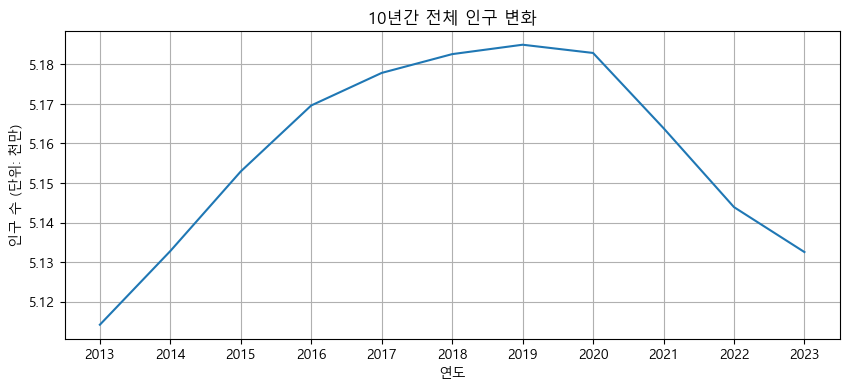

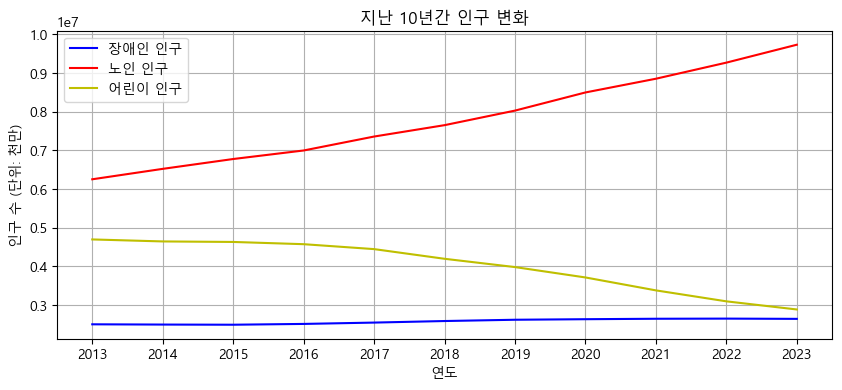

In [5]:
import matplotlib.pyplot as plt

years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

plt.figure(figsize=(10, 4))
plt.plot(all)
plt.title("10년간 전체 인구 변화")
plt.xticks(range(len(all)), years)  # x축에 연도 표시
plt.xlabel('연도')
plt.ylabel('인구 수 (단위: 천만)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(handicap, 'b', label='장애인 인구')
plt.plot(old, 'r', label='노인 인구')
plt.plot(child, 'y', label='어린이 인구')
plt.xticks(range(len(handicap)), years)  # x축에 연도 표시
plt.xlabel('연도')
plt.title('지난 10년간 인구 변화')
plt.ylabel('인구 수 (단위: 천만)')
plt.legend()
plt.grid(True)
plt.show()

### 0-2. 지금의 대한민국의 인구구성

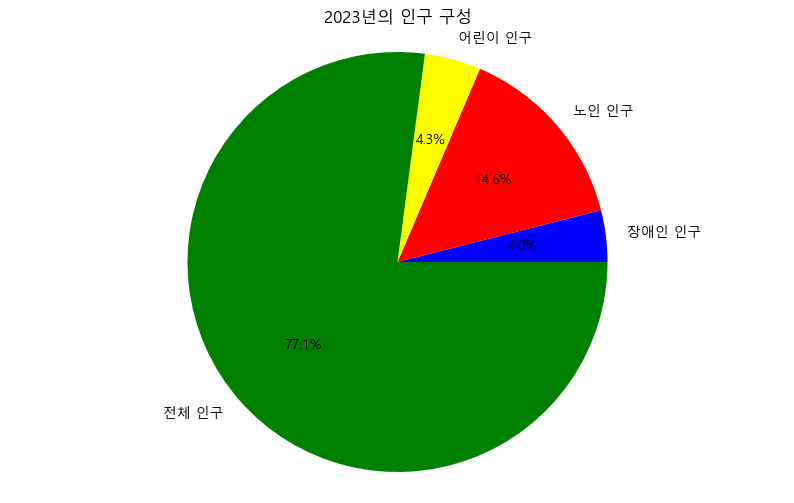

In [6]:
import csv
import matplotlib.pyplot as plt

#위에서 확인한 가장 마지막 정보로 리스트 생성
labels = ['장애인 인구', '노인 인구', '어린이 인구', '전체 인구']
values = [2641896 ,9730411,2884670, 51325329]

# 원 그래프 생성
plt.figure(figsize=(10, 6))
plt.pie(values, labels=labels, colors=['blue','red','yellow','green'], autopct='%1.1f%%', )
plt.title('2023년의 인구 구성')
plt.axis('equal')
plt.show()

도표를 보면 알 수 있듯이 어린이 인구는 꾸준히 감소하고 있고, 노인 인구는 현재 거의 1000만명에 가까워지고 있습니다.  
장애인 인구는 약 250만명에서 변화가 없었으나 어린이 인구가 감소함에 따라 둘의 수가 비슷해졌습니다.   
이어서 이번엔 대한민국의 복지시설 현황에 대해서 살펴보겠습니다.

### 0-3. 국내 복지시설 현황

In [7]:
with open("..\데이터\아동복지시설수_및_보호아동현황__시도별_20241122115745.csv", encoding='cp949') as f:
    data = csv.reader(f) # 헤더 스킵
    data_array = [] 

    for row in data: # csv 데이터의 한 행을 row에 삽입
        data_array.append(row)
        print(row)

['행정구역별(1)', '2010', '2010', '2010', '2010', '2011', '2011', '2011', '2011', '2012', '2012', '2012', '2012', '2013', '2013', '2013', '2013', '2014', '2014', '2014', '2014', '2015', '2015', '2015', '2015', '2016', '2016', '2016', '2016', '2017', '2017', '2017', '2017', '2018', '2018', '2018', '2018', '2019', '2019', '2019', '2019']
['행정구역별(1)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)']
['전국', '280', '6188', '6655', '17119', '280', '5870', '6478', '16523', '281', '5427', '6034', '15916', '281', '4401', '5048', '15239', '278', '4822', '5431', '14630

['행정구역별(1)', '2010', '2010', '2010', '2010', '2011', '2011', '2011', '2011', '2012', '2012', '2012', '2012', '2013', '2013', '2013', '2013', '2014', '2014', '2014', '2014', '2015', '2015', '2015', '2015', '2016', '2016', '2016', '2016', '2017', '2017', '2017', '2017', '2018', '2018', '2018', '2018', '2019', '2019', '2019', '2019']
['행정구역별(1)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)']
['전국', '280', '6188', '6655', '17119', '280', '5870', '6478', '16523', '281', '5427', '6034', '15916', '281', '4401', '5048', '15239', '278', '4822', '5431', '14630

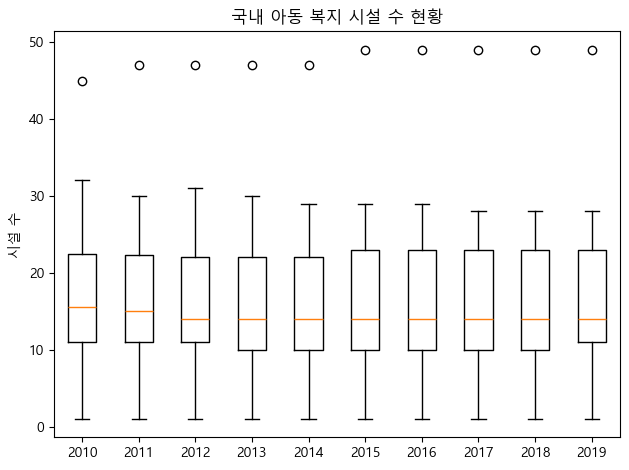

In [10]:
import csv
import matplotlib.pyplot as plt

# 데이터 전처리
data_array = []  # 전체 데이터를 저장할 배열
facilitycount = []  # 시설 수를 연도별로 저장할 배열 ex) 0행은 2010년, 1행은 2011년..
years = [2010 + i for i in range(10)]  # xlabel 연도설정용도

with open("..\데이터\아동복지시설수_및_보호아동현황__시도별_20241122115745.csv", encoding='cp949') as f:  # 경로지정
    data = csv.reader(f)

    for row in data:  # csv 데이터의 한 행을 row에 삽입
        data_array.append(row)  # 행으로 받은 row를 data_array에 집어넣음으로써 2차원 배열 data_array생성

    for i in range(1, min(len(data_array[0]), 45), 4):  # '시설수'열 이 존재하는 1열, 5열, 9열....을 지정하기 위해 range사용
        inner = []
        for j in range(len(data_array)):  # 행 개수
            if data_array[j][i] != '-':  # 값이 비어 있지 않은 경우
                try:
                    value = int(data_array[j][i])  # 정수로 변환
                    if value < 100:  # 지역 별 시설 수 데이터는 100이 넘지 않음을 확인 후 조건 생성
                        inner.append(value)  # inner에 데이터 저장
                except ValueError:
                    pass  # 변환 실패 시 무시
        if len(inner) in [16, 17]:  # 세종특별자치시의 경우 2010년 시설이 없다가 후에 추가되었기에 inner의 개수가 16인 경우도 가능케함.
            facilitycount.append(inner)

# 박스플롯 그리기
for i in data_array:
    print(i)

for i in facilitycount:
    print(i)

plt.boxplot(facilitycount)  # 지역별 데이터
plt.title("국내 아동 복지 시설 수 현황")
plt.xticks(ticks=range(1, len(years) + 1), labels=years)
plt.ylabel("시설 수")
plt.tight_layout()
plt.show()

- 서울특별시의 경우 이상치로 인식되는 결과 발생했습니다. 이는 서울시에 시설이 가장 많았다는 것을 의미합니다.
 - 국내 시설 수의 중앙값은 10개 초반에 분포함을 알 수 있었습니다. 

['시설별(1)', '시설별(2)', '시설수 (개소)', '입소정원 (명)', '시설수 (개소)', '입소정원 (명)', '시설수 (개소)', '입소정원 (명)', '시설수 (개소)', '입소정원 (명)', '시설수 (개소)', '입소정원 (명)', '시설수 (개소)', '입소정원 (명)', '시설수 (개소)', '입소정원 (명)', '시설수 (개소)', '입소정원 (명)', '시설수 (개소)', '입소정원 (명)', '시설수 (개소)', '입소정원 (명)']
['노인주거복지시설', '양로시설', '272', '13903', '265', '13446', '265', '13283', '252', '12562', '238', '12510', '232', '13036', '209', '11619', '192', '9962', '180', '9752', '175', '9653']
['노인주거복지시설', '노인공동생활가정', '142', '1173', '131', '1087', '128', '1062', '119', '1092', '117', '998', '115', '954', '107', '953', '107', '930', '89', '763', '82', '710']
['노인주거복지시설', '노인복지주택', '29', '5034', '31', '5376', '32', '5648', '33', '5998', '35', '6389', '35', '7684', '36', '7925', '38', '8491', '39', '8840', '40', '9006']
['노인의료복지시설', '노인요양시설', '2707', '132387', '2933', '141479', '3136', '150025', '3261', '153785', '3390', '160594', '3595', '174015', '3844', '186289', '4057', '199134', '4346', '216784', '4525', '228495']
['노인의료복지시설', '노인요양공동생활가정', '

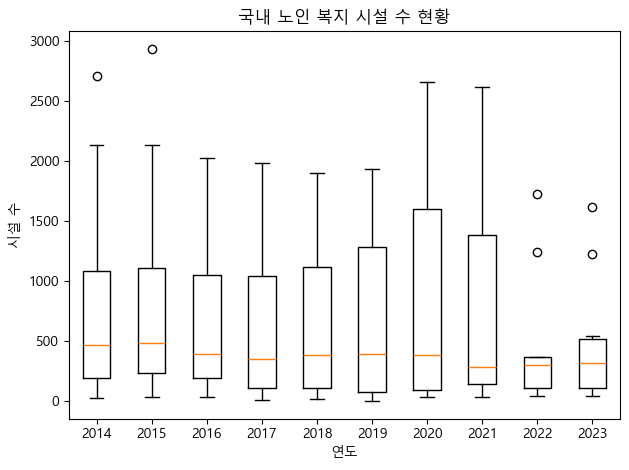

In [13]:
import csv
import matplotlib.pyplot as plt

# 데이터 전처리
data_array = []  # 전체 데이터를 저장할 배열
facilitycount = []  # 시설 수를 연도별로 저장할 배열
years = [2014 + i for i in range(10)]  # 연도 리스트 생성

with open("..\데이터\노인복지_생활시설_수_및_생활현황_20241122115611.csv", encoding='cp949') as f:  # 경로 지정
    data = csv.reader(f)
    next(data)  # 헤더 건너뜀

    for row in data:
        # '소계' 행은 건너뛰기
        if row[1] == '소계':
            continue
        data_array.append(row)  # 조건을 통과한 행만 저장
        
    for i in range(2, min(len(data_array[0]), 22), 2):  # '시설수' 열을 지정하는 1열, 5열, 9열 등을 탐색
        inner = []
        for j in range(len(data_array)):  # 행 개수
            if data_array[j][i] != '-':  # 값이 비어 있지 않은 경우
                try:
                    value = int(data_array[j][i])  # 정수로 변환
                    if value < 3000:  # 시설 수 데이터가 3000을 넘지 않을 경우만 저장
                        inner.append(value)
                except ValueError:
                    pass  # 변환 실패 시 무시
        if len(inner) in range(9,15):  # 특정 복지지자치의 경우 시설이 없는 경우도 포함
            facilitycount.append(inner)

# 결과 확인
for i in data_array:
    print(i)

# 박스플롯 생성
plt.boxplot(facilitycount)
plt.title("국내 노인 복지 시설 수 현황")
plt.xticks(ticks=range(1, len(years) + 1), labels=years)
plt.xlabel("연도")
plt.ylabel("시설 수")
plt.tight_layout()
plt.show()


['노인여가복지시설', '경로당', '63960', '0', '64568', '0', '65044', '-', '65604', '-', '66286', '-', '66737', '-', '67316', '0', '67211', '0', '68180', '0', '68792', '0']


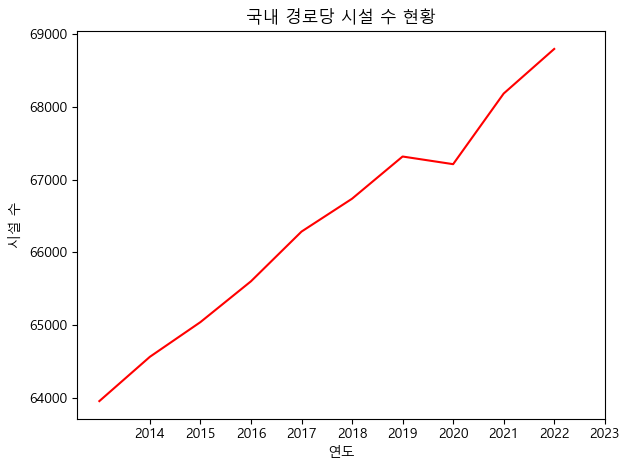

In [14]:
import csv
import matplotlib.pyplot as plt

# 데이터 전처리  
facilitycount = []  # 시설 수를 연도별로 저장할 배열
data_array = []
years = [2014 + i for i in range(10)]  # 연도 리스트 생성

with open("..\데이터\노인복지_생활시설_수_및_생활현황_20241122115611.csv", encoding='cp949') as f:  # 경로 지정
    data = csv.reader(f)
    next(data)  # 헤더 건너뜀

    for row in data:
        # '소계' 행은 건너뛰기
        if row[1] != '경로당':
            continue
        else:
            data_array.append(row)  # 조건을 통과한 행만 저장   

# 결과 확인
for i in data_array:
    print(i)

facilitycount = i[2:]
facilitycount = facilitycount[::2]
facilitycount = [int(value) for value in facilitycount]

plt.plot(facilitycount, color = 'red')
plt.title("국내 경로당 시설 수 현황")
plt.xticks(ticks=range(1, len(years) + 1), labels=years)
plt.xlabel("연도")
plt.ylabel("시설 수")
plt.tight_layout()
plt.show()

- 해가 갈수록 고령화에 따라서 시설 수도 증가했음을 알 수 있습니다.
- 이제 본격적으로 사회적 약자와 그 시설을 연관하여서 분석한 내용을 소개하겠습니다.

## 1. 장애인과 장애인 편의시설 분석

- 장애인의 시설 거주 비율을 확인하고 분석 대상을 설정합니다. (1-1)
- 지역별 장애인 편의시설 설치 현황을 분석합니다. (1-3, 1-4)
- 지역별 장애인 수와 편의시설 수의 관계를 분석합니다. (1-5)

### 1-1. plt.pie()를 통한 장애인의 시설 거주 비율 확인

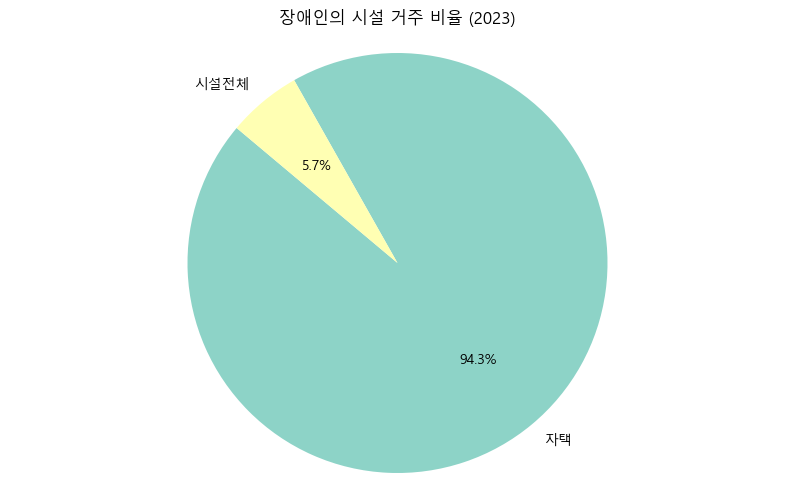

In [155]:
import csv
import matplotlib.pyplot as plt

labels = []
values = []

with open('../데이터/보조 데이터/2023_장애유형별_거주형태별_비율_20241130125729.csv', 'r', encoding='utf-8') as f:
    data = csv.reader(f)

    next(data)

    for row in data:
        labels.append(row[1])
        values.append(float(row[3]))

# 원 그래프 생성
plt.figure(figsize=(10, 6))
plt.pie(values[0:2], labels=labels[0:2], autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('장애인의 시설 거주 비율 (2023)')
plt.axis('equal')
plt.show()


- 장애인의 시설 거주 비율보다 자택 거주 비율이 훨씬 높습니다.
- 따라서 분석 대상을 주거시설이 아닌 장애인 편의시설로 설정하였습니다.

### 1-2. 2023년도 지역별 장애인 편의시설 설치 현황 데이터 사용

In [157]:
import csv

inst_status_pwd_2023 = []

with open('../데이터/2018_2023_시도별_장애인_편의시설_설치현황.csv', 'r', encoding='utf-8') as f:
    data = csv.reader(f)

    next(data)

    for row in data:
        row_2023 = row[0:1] + row[7:13]
        inst_status_pwd_2023.append(row_2023)
        print(row_2023)

['구분', '대상건물', '기준항목', '설치', '설치율', '적정설치', '적정설치율']
['서울', '34440', '812487', '747930', '92.1%', '682738', '84.0%']
['부산', '16320', '440244', '396768', '90.1%', '349422', '79.4%']
['대구', '8018', '263653', '237186', '90.0%', '214106', '81.2%']
['인천', '12555', '358048', '323222', '90.3%', '282107', '78.8%']
['광주', '7711', '227541', '203779', '89.6%', '178692', '78.5%']
['대전', '3945', '134611', '121277', '90.1%', '109774', '81.6%']
['울산', '2686', '92885', '84107', '90.6%', '76757', '82.6%']
['세종', '1421', '57530', '53897', '93.7%', '49854', '86.7%']
['경기', '44352', '1286189', '1172564', '91.2%', '1063908', '82.7%']
['강원', '8930', '288648', '245749', '85.1%', '213159', '73.9%']
['충북', '8028', '231005', '203961', '88.3%', '179874', '77.9%']
['충남', '11208', '343658', '303847', '88.4%', '269117', '78.3%']
['전북', '11212', '391752', '341557', '87.2%', '294994', '75.3%']
['전남', '10722', '361499', '305110', '84.4%', '258609', '71.5%']
['경북', '14782', '468721', '406321', '86.7%', '359225', '76.6%

### 1-3. plt.bar()를 통한 지역별 장애인 편의시설 설치 현황 시각화

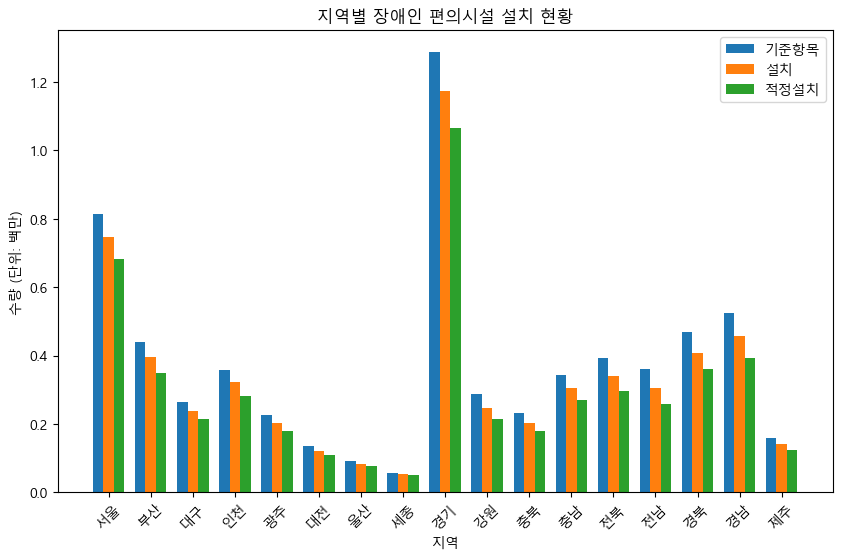

In [158]:
# 데이터 전처리
regions = [row[0] for row in inst_status_pwd_2023[1:-1]]
criteria = [int(row[2]) / 1e6 for row in inst_status_pwd_2023[1:-1]]
installations = [int(row[3]) / 1e6 for row in inst_status_pwd_2023[1:-1]]
appropriate_inst = [int(row[5]) / 1e6 for row in inst_status_pwd_2023[1:-1]]

# 바 그래프 그리기
x = np.arange(len(regions))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, criteria, width, label='기준항목')
bars2 = ax.bar(x, installations, width, label='설치')
bars3 = ax.bar(x + width, appropriate_inst, width, label='적정설치')

# 그래프에 레이블 추가
ax.set_xlabel('지역')
ax.set_ylabel('수량 (단위: 백만)')
ax.set_title('지역별 장애인 편의시설 설치 현황')
ax.set_xticks(x)
ax.set_xticklabels(regions, rotation=45)
ax.legend()
plt.show()


- **기준항목**이란 법적 기준에 의거하여 설치해야하는 장애인 편의시설 수입니다.
- **설치**는 설치된 장애인 편의시설 수입니다.
- **적정설치**는 설치된 장애인 편의시설 중에서 법적 기준을 준수한 시설 수입니다.
- 경기 지역에 기준항목 수가 가장 많았습니다.

### 1-4. sns.heatmap()을 통한 지역별 장애인 편의시설 설치율 및 적정설치율 비교

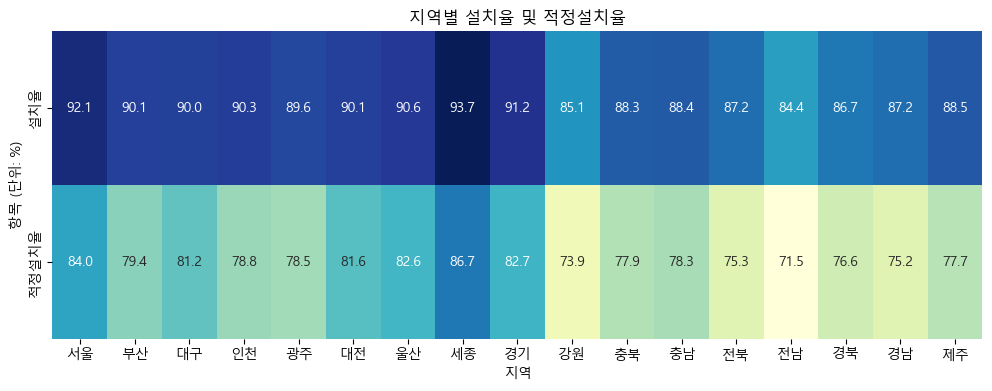

In [159]:
import seaborn as sns

inst_rate = [float(row[4].replace('%', '')) for row in inst_status_pwd_2023[1:-1]]
appropriate_inst_rate = [float(row[6].replace('%', '')) for row in inst_status_pwd_2023[1:-1]]

# 히트맵 데이터 생성
data = np.array([inst_rate, appropriate_inst_rate])
labels = ['설치율', '적정설치율']

# 히트맵 그리기
fig, ax = plt.subplots(figsize=(12, 4))

sns.heatmap(data, annot=True, fmt=".1f", cmap="YlGnBu", xticklabels=regions, yticklabels=labels, ax=ax, cbar=False)
ax.set_xlabel('지역')
ax.set_ylabel('항목 (단위: %)')
ax.set_title('지역별 설치율 및 적정설치율')
plt.show()

- **설치율**은 기준항목 대비 설치 비율입니다.   
- **적정설치율**은 기준항목 대비 적정설치 비율로, 시설의 품질을 의미한다고 볼 수 있습니다.
- 색이 진할 수록 비율이 높아지며 색이 연할 수록 비율이 낮아집니다.
- 세종, 서울, 경기 지역에서 설치율과 적정설치율이 모두 높았으며, 전남과 강원 지역에서 설치율과 적정설치율이 모두 낮았습니다.

### 1-5. plt.scatter()를 통한 지역별 장애인구 수와 편의시설 수의 관계 시각화

#### 1-5-1. 2023년도 지역별 장애인구 수 데이터 사용

In [91]:
pwd_2023 = []

with open('../데이터/2023_장애유형별_시도별_등록장애인_수_20241130123153.csv', 'r', encoding='utf-8') as f:
    data = csv.reader(f)

    for row in data:
        row_2023 = row[1:3]
        pwd_2023.append(row_2023)
        print(row_2023)

['시도별', '합계']
['전국', '2641896']
['서울특별시', '389795']
['부산광역시', '175467']
['대구광역시', '130521']
['인천광역시', '152226']
['광주광역시', '69314']
['대전광역시', '71440']
['울산광역시', '51383']
['세종특별자치시', '12944']
['경기도', '586421']
['강원특별자치도', '100520']
['충청북도', '97117']
['충청남도', '134004']
['전북특별자치도', '130189']
['전라남도', '136472']
['경상북도', '178340']
['경상남도', '188825']
['제주특별자치도', '36918']


#### 1-5-2. 지역별 장애인구 수 대비 편의시설 수 산점도 그리기

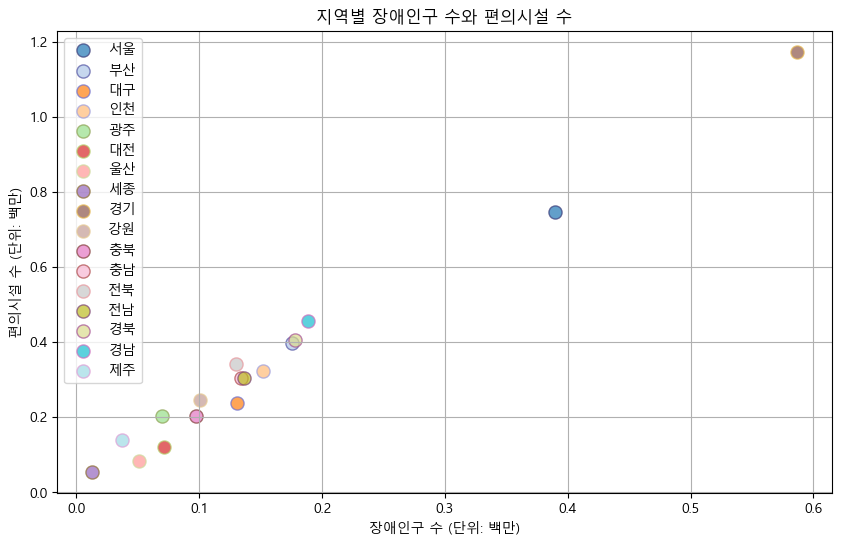

In [12]:
regions = [row[0] for row in inst_status_pwd_2023[1:-1]]
installations = [int(row[3]) / 1e6 for row in inst_status_pwd_2023[1:-1]]
population = [int(row[1]) / 1e6 for row in pwd_2023[2:]]

# 색상 지정
face_colors = plt.cm.tab20(np.linspace(0, 1, len(regions)))
edge_colors = plt.cm.tab20b(np.linspace(0, 1, len(regions)))

# 산점도 그리기
plt.figure(figsize=(10, 6))
for i, region in enumerate(regions):
    plt.scatter(population[i], installations[i], color=face_colors[i], edgecolors=edge_colors[i], label=region, alpha=0.7, s=90)

plt.xlabel('장애인구 수 (단위: 백만)')
plt.ylabel('편의시설 수 (단위: 백만)')
plt.title('지역별 장애인구 수와 편의시설 수')
plt.legend()
plt.grid(True)
plt.show()

- 서울과 경기 지역에서 장애인구 수와 편의시설 수가 모두 많았습니다.
- 평균적으로 편의시설 수는 장애인구 수보다 약 2배 정도 많았습니다.
- 편의시설 수량이 체감이 안되는 이유는 편의시설 항목 안에 시설을 구성하는 비치용품 등을 포함하고 있기 때문입니다.

#### 1-5-3. 평균 비율 선으로 장애인구 수 대비 편의시설 수가 상대적으로 많은 지역 분석

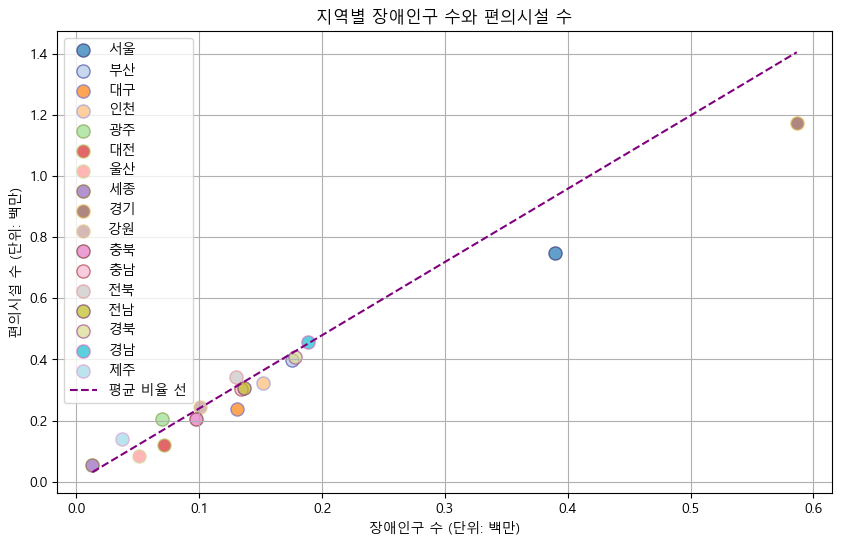

In [13]:
import numpy as np

regions = [row[0] for row in inst_status_pwd_2023[1:-1]]
installations = [int(row[3]) / 1e6 for row in inst_status_pwd_2023[1:-1]]
population = [int(row[1]) / 1e6 for row in pwd_2023[2:]]

# 색상 지정
face_colors = plt.cm.tab20(np.linspace(0, 1, len(regions)))
edge_colors = plt.cm.tab20b(np.linspace(0, 1, len(regions)))

# 산점도 그리기
plt.figure(figsize=(10, 6))
for i, region in enumerate(regions):
    plt.scatter(population[i], installations[i], color=face_colors[i], edgecolors=edge_colors[i], label=region, alpha=0.7, s=90)

# 평균 비율 계산
mean_ratio = np.mean([installations[i] / population[i] for i in range(len(regions))])
x_vals = np.linspace(min(population), max(population), 100)
y_vals = mean_ratio * x_vals
plt.plot(x_vals, y_vals, color='purple', linestyle='--', label='평균 비율 선')

plt.xlabel('장애인구 수 (단위: 백만)')
plt.ylabel('편의시설 수 (단위: 백만)')
plt.title('지역별 장애인구 수와 편의시설 수')
plt.legend()
plt.grid(True)
plt.show()


- 타 지역에 비해 상대적으로 세종, 제주, 광주, 전북 등이 장애인구 수 대비 편의시설 수가 높았습니다.
- 설치율과 적정설치율이 모두 높았던 경기와 서울의 경우, 장애인구 수 대비 편의시설 수는 상대적으로 낮았습니다.

## 2. 아동과 아동복지시설 분석

- 연도별 국내 아동복지시설 수의 지역별 편차를 분석합니다. (2-1)
- 대표적인 아동복지시설이라고 할 수 있는 어린이집과 아동양육시설을 비교 분석합니다. (2-4, 2-5)
- **어린이집**은 6세 미만 아동이 입소하는 대표적인 아동복지시설입니다.
- **아동양육시설**은 보호자가 없는 만 18세 미만의 아동이 입소하여 보호조치를 받는 시설입니다.
- 6세 미만 아동 수 대비 어린이집 수를 분석합니다. (2-6)
- 6세 미만 아동 수 대비 아동양육시설 수를 분석합니다. (2-7)

### 2-1. plt.boxplot()을 통한 연도별 국내 아동복지시설 수의 지역별 편차 분석

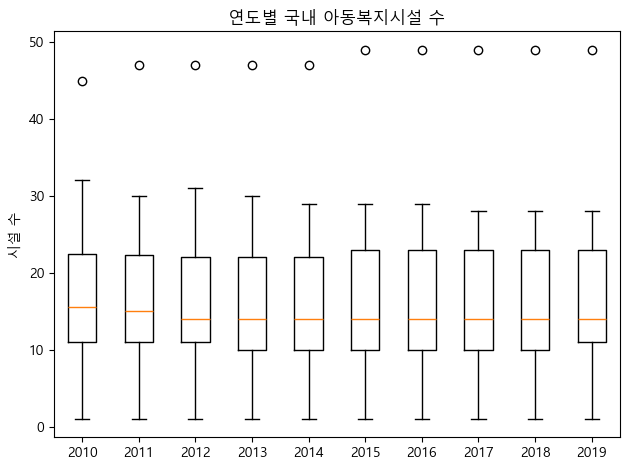

In [161]:
import csv
import matplotlib.pyplot as plt

# 데이터 전처리
data_array = []  # 전체 데이터를 저장할 배열
facilitycount = []  # 시설 수를 연도별로 저장할 배열 ex) 0행은 2010년, 1행은 2011년..
years = [2010 + i for i in range(10)]  # xlabel 연도설정용도

with open("..\데이터\아동복지시설수_및_보호아동현황__시도별_20241122115745.csv", encoding='cp949') as f:  # 경로지정
    data = csv.reader(f)

    for row in data:  # csv 데이터의 한 행을 row에 삽입
        data_array.append(row)  # 행으로 받은 row를 data_array에 집어넣음으로써 2차원 배열 data_array생성

    for i in range(1, min(len(data_array[0]), 45), 4):  # '시설수'열 이 존재하는 1열, 5열, 9열....을 지정하기 위해 range사용
        inner = []
        for j in range(len(data_array)):  # 행 개수
            if data_array[j][i] != '-':  # 값이 비어 있지 않은 경우
                try:
                    value = int(data_array[j][i])  # 정수로 변환
                    if value < 100:  # 지역 별 시설 수 데이터는 100이 넘지 않음을 확인 후 조건 생성
                        inner.append(value)  # inner에 데이터 저장
                except ValueError:
                    pass  # 변환 실패 시 무시
        if len(inner) in [16, 17]:  # 세종특별자치시의 경우 2010년 시설이 없다가 후에 추가되었기에 inner의 개수가 16인 경우도 가능케함.
            facilitycount.append(inner)

plt.boxplot(facilitycount)  # 지역별 데이터
plt.title("연도별 국내 아동복지시설 수")
plt.xticks(ticks=range(1, len(years) + 1), labels=years)
plt.ylabel("시설 수")
plt.tight_layout()
plt.show()


- 지역간 아동복지시설 수의 편차가 일정하게 유지되어 오고 있는 것을 확인할 수 있습니다.
- 이상치로 분류되는 지역이 어디인지 다음 그래프에서 확인해 보겠습니다.

### 2-2. 2022년도 지역별 어린이집 현황 데이터 사용

In [92]:
import csv

inst_daycare_chd_2022 = []

with open('../데이터/어린이집_현황_시도_20241122115855.csv', 'r', encoding='euc-kr') as f:
    data = csv.reader(f)

    next(data)

    for row in data:
        row_2022 = row[0:1] + row[-2:-1]
        inst_daycare_chd_2022.append(row_2022)
        

with open('../데이터/전국_어린이집_정현원_현황_20241202230814.csv', 'r', encoding='utf-8') as f:
    data = csv.reader(f)

    next(data)

    for i, row in enumerate(data):
        inst_daycare_chd_2022[i] += row[2:]
        print(inst_daycare_chd_2022[i])
        
        

['전국', '30923', '1476686', '1095450']
['서울특별시', '4712', '223628', '167427']
['부산광역시', '1547', '76146', '55850']
['대구광역시', '1139', '59434', '42487']
['인천광역시', '1697', '80896', '62200']
['광주광역시', '940', '46531', '31732']
['대전광역시', '1013', '39145', '28144']
['울산광역시', '656', '31746', '24892']
['세종특별자치시', '327', '18789', '14927']
['경기도', '9438', '424321', '331516']
['강원특별자치도', '906', '45475', '32680']
['충청북도', '972', '54338', '38884']
['충청남도', '1516', '72870', '52196']
['전북특별자치도', '1024', '51748', '34789']
['전라남도', '999', '56047', '38927']
['경상북도', '1463', '72231', '48988']
['경상남도', '2123', '96773', '68841']
['제주특별자치도', '451', '26568', '20970']


### 2-3. 2022년도 지역별 아동양육시설 현황 데이터 사용

In [93]:
import csv

inst_welfare_chd_2022 = []

with open('../데이터/2022_아동복지시설_보호아동_성별_취학_현황.csv', 'r', encoding='utf-8') as f:
    data = csv.reader(f)

    next(data)
    next(data)

    for row in data:
        row_2022 = row[0:2] + row[3:5] + row[8:]
        inst_welfare_chd_2022.append(row_2022)
        print(row_2022)

['구분', '시설수', '정원', '계', '0~3세미만', '3~6세미만', '초등재', '중재', '고재', '대재', '기타']
['계', '306', '15479', '10312', '655', '1436', '3806', '1781', '1780', '444', '410']
['서울', '43', '2494', '1923', '180', '399', '747', '219', '236', '46', '96']
['부산', '20', '1210', '800', '39', '75', '281', '134', '229', '19', '23']
['대구', '22', '1079', '637', '23', '71', '249', '117', '102', '24', '51']
['인천', '16', '671', '506', '54', '70', '198', '101', '77', '3', '3']
['광주', '15', '629', '452', '47', '54', '175', '79', '68', '16', '13']
['대전', '13', '712', '402', '15', '50', '119', '102', '72', '8', '36']
['울산', '3', '189', '125', '7', '19', '51', '28', '9', '3', '8']
['세종', '1', '48', '18', '', '1', '4', '5', '7', '', '1']
['경기', '37', '1458', '1024', '77', '154', '392', '203', '158', '10', '30']
['강원', '11', '467', '274', '21', '23', '81', '48', '46', '31', '24']
['충북', '16', '672', '477', '35', '63', '180', '75', '77', '20', '27']
['충남', '14', '770', '564', '35', '97', '210', '95', '82', '36', '9']
['전북'

### 2-4. plt.bar()를 통한 지역별 어린이집 수와 아동양육시설 수 비교

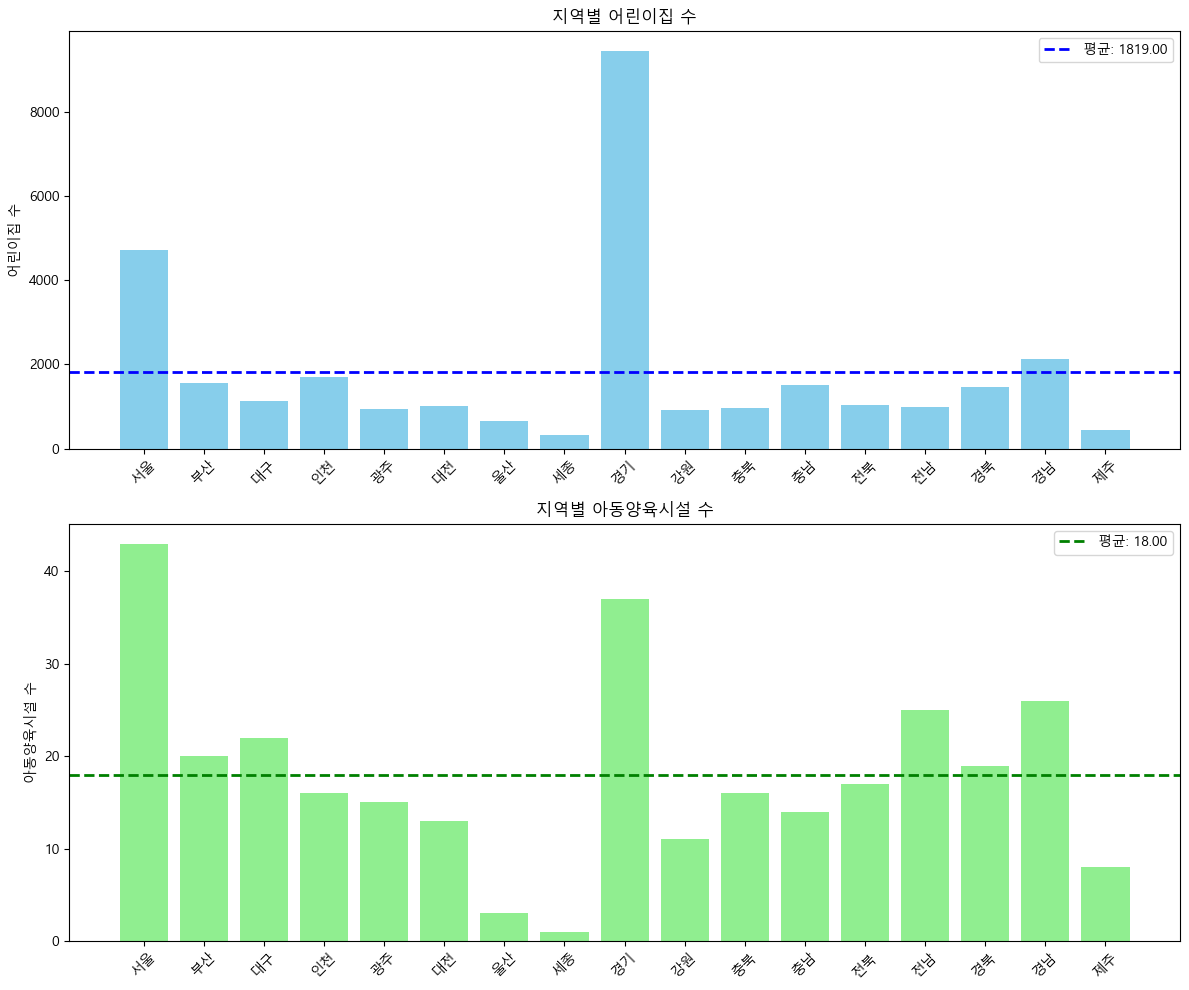

In [108]:
import matplotlib.pyplot as plt

# 데이터 변환
regions = [row[0] for row in inst_welfare_chd_2022[2:]]
daycare = [int(row[1]) for row in inst_daycare_chd_2022[1:]]
welfare = [int(row[1]) for row in inst_welfare_chd_2022[2:]]

# 평균 계산
avg_daycare = sum(daycare) / len(daycare)
avg_welfare = sum(welfare) / len(welfare)

# 서브플롯 생성
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# 유치원 바 그래프
axes[0].bar(regions, daycare, color='skyblue')
axes[0].axhline(avg_daycare, color='blue', linestyle='--', linewidth=2, label=f'평균: {avg_daycare:.2f}')
axes[0].set_title('지역별 어린이집 수')
axes[0].set_ylabel('어린이집 수')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()

# 아동복지시설 바 그래프
axes[1].bar(regions, welfare, color='lightgreen')
axes[1].axhline(avg_welfare, color='green', linestyle='--', linewidth=2, label=f'평균: {avg_welfare:.2f}')
axes[1].set_title('지역별 아동양육시설 수')
axes[1].set_ylabel('아동양육시설 수')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()


- 서울과 경기 지역의 아동복지시설 수가 많았습니다.
- 앞서 박스플롯에서 살펴본 이상치가 서울 지역이었다는 것을 알 수 있습니다.
- 어린이집 수는 아동양육시설 수의 약 100배 정도임을 알 수 있습니다.

### 2-5. sns.heatmap()을 통한 지역별 아동복지시설의 포화도 시각화

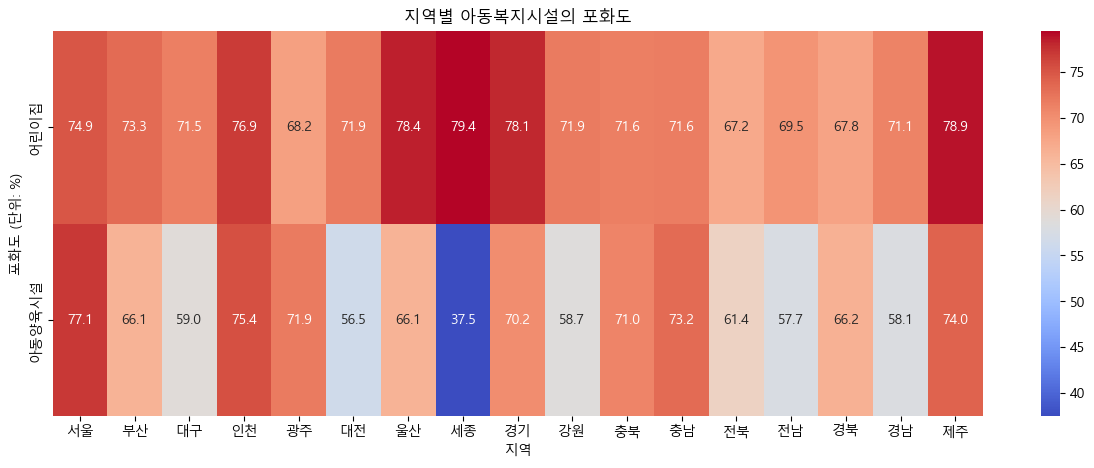

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 변환
regions = [row[0] for row in inst_welfare_chd_2022[2:]]
daycare_capacity = [int(row[2]) for row in inst_daycare_chd_2022[1:]]
daycare_current = [int(row[3]) for row in inst_daycare_chd_2022[1:]]
welfare_capacity = [int(row[2]) for row in inst_welfare_chd_2022[2:]]
welfare_current = [int(row[3]) for row in inst_welfare_chd_2022[2:]]

daycare_pers = [(daycare_current[i] / daycare_capacity[i]) * 100 for i in range(len(daycare_capacity))]
welfare_pers = [(welfare_current[i] / welfare_capacity[i]) * 100 for i in range(len(welfare_capacity))]

# 히트맵 데이터 생성
data = np.array([daycare_pers, welfare_pers])
labels = ['어린이집', '아동양육시설']

# 히트맵 그리기
fig, ax = plt.subplots(figsize=(15, 5))

sns.heatmap(data, annot=True, fmt=".1f", cmap="coolwarm", xticklabels=regions, yticklabels=labels, ax=ax)
ax.set_xlabel('지역')
ax.set_ylabel('포화도 (단위: %)')
ax.set_title('지역별 아동복지시설의 포화도')
plt.show()

- **포화도**는 아동복지시설의 정원 수 대비 입소자 수입니다.
- 붉은색에 가까운 지역일수록 아동복지시설의 포화도가 높은 지역이며 푸른색에 가까운 지역일수록 포화도가 낮은 지역입니다.
- 어린이집의 포화도는 모든 지역에서 전반적으로 높으며, 세종이 가장 높습니다.
- 아동양육시설의 경우, 서울의 포화도가 가장 높으며, 세종이 가장 낮습니다.

### 2-6. 6세 미만 아동 인구 수 대비 어린이집 수 시각화

#### 2-6-1. 2022년도 지역별 6세 미만 인구수 데이터 사용

In [96]:
import csv

chd_2022 = []

with open('../데이터/1996~2023연령별_인구변화_전체.csv', 'r', encoding='euc-kr') as f:
    data = csv.reader(f)

    next(data)
    next(data)

    for row in data:
        if row[1] == '계' or row[1] == '100세 이상':
            continue
        if int(row[1].replace('세', '')) < 6:
            found = False
            for item in chd_2022:
                if item[0] == row[0]:
                    item.append(row[-2])
                    found = True
                    break
            if not found:
                chd_2022.append([row[0], row[-2]])
    
for row in chd_2022:
    print(row)

['전국', '244250', '264788', '277529', '307975', '333048', '364198']
['서울특별시', '40742', '43950', '44177', '48120', '50630', '55088']
['부산광역시', '13792', '14862', '15580', '17495', '19543', '21678']
['대구광역시', '9994', '11014', '11667', '13672', '14875', '16661']
['인천광역시', '14617', '15716', '16671', '18560', '19985', '21355']
['광주광역시', '7333', '8099', '7980', '9120', '9967', '10974']
['대전광역시', '7651', '7924', '7922', '8752', '9364', '10555']
['울산광역시', '5275', '6071', '6433', '7279', '7907', '8892']
['세종특별자치시', '3100', '3611', '3655', '4114', '4484', '4889']
['경기도', '74114', '79007', '82889', '91427', '98890', '107169']
['강원도', '7240', '7610', '8222', '8789', '8899', '9611']
['충청북도', '7337', '8312', '8689', '9355', '10697', '11414']
['충청남도', '10106', '11191', '12188', '13386', '14440', '15899']
['전라북도', '6912', '7584', '8302', '9190', '10220', '11491']
['전라남도', '7713', '8492', '9299', '10342', '10770', '11689']
['경상북도', '11097', '11985', '12838', '14248', '15681', '17028']
['경상남도', '13704', '

#### 2-6-2. plt.scatter()를 통해 시각화

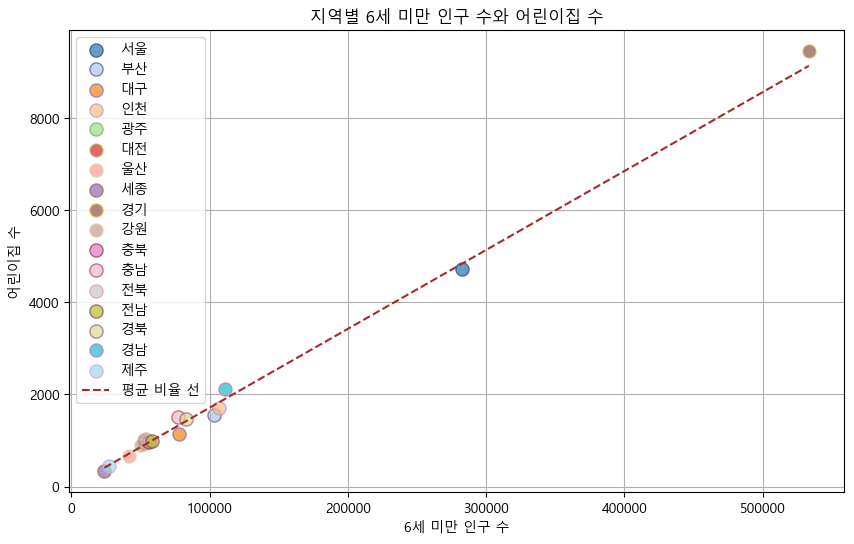

In [105]:
regions = [row[0] for row in inst_welfare_chd_2022[2:]]
daycare = [int(row[1]) for row in inst_daycare_chd_2022[1:]]
population = [int(row[1]) + int(row[2]) + int(row[3]) + int(row[4]) + int(row[5]) + int(row[6]) for row in chd_2022[1:]]

# 색상 지정
face_colors = plt.cm.tab20(np.linspace(0, 1, len(regions)))
edge_colors = plt.cm.tab20b(np.linspace(0, 1, len(regions)))

# 산점도 그리기
plt.figure(figsize=(10, 6))
for i, region in enumerate(regions):
    plt.scatter(population[i], daycare[i], color=face_colors[i], edgecolors=edge_colors[i], label=region, alpha=0.7, s=90)

# 평균 비율 계산
mean_ratio = np.mean([daycare[i] / population[i] for i in range(len(regions))])
x_vals = np.linspace(min(population), max(population), 100)
y_vals = mean_ratio * x_vals
plt.plot(x_vals, y_vals, color='brown', linestyle='--', label='평균 비율 선')

plt.xlabel('6세 미만 인구 수')
plt.ylabel('어린이집 수')
plt.title('지역별 6세 미만 인구 수와 어린이집 수')
plt.legend()
plt.grid(True)
plt.show()

- 6세 미만 인구 수 대비 어린이집 수가 상대적으로 많은 지역은 충남, 경남, 경기입니다.
- 일정 비율을 모든 지역에서 따르고 있기 때문에 어린이집 수와 인구 수 사이에 강한 상관관계가 있음을 짐작해 볼 수 있습니다.

### 2-7. plt.scatter()를 통한 6세 미만 아동 수와 아동양육시설 수 관계 시각화

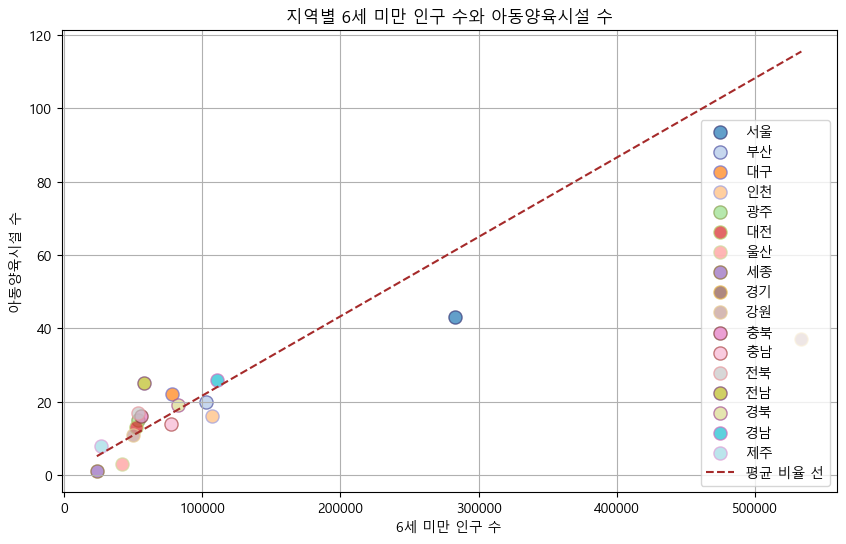

In [106]:
regions = [row[0] for row in inst_welfare_chd_2022[2:]]
welfare = [int(row[1]) for row in inst_welfare_chd_2022[2:]]
population = [int(row[1]) + int(row[2]) + int(row[3]) + int(row[4]) + int(row[5]) + int(row[6]) for row in chd_2022[1:]]

# 색상 지정
face_colors = plt.cm.tab20(np.linspace(0, 1, len(regions)))
edge_colors = plt.cm.tab20b(np.linspace(0, 1, len(regions)))

# 산점도 그리기
plt.figure(figsize=(10, 6))
for i, region in enumerate(regions):
    plt.scatter(population[i], welfare[i], color=face_colors[i], edgecolors=edge_colors[i], label=region, alpha=0.7, s=90)

# 평균 비율 계산
mean_ratio = np.mean([welfare[i] / population[i] for i in range(len(regions))])
x_vals = np.linspace(min(population), max(population), 100)
y_vals = mean_ratio * x_vals
plt.plot(x_vals, y_vals, color='brown', linestyle='--', label='평균 비율 선')

plt.xlabel('6세 미만 인구 수')
plt.ylabel('아동양육시설 수')
plt.title('지역별 6세 미만 인구 수와 아동양육시설 수')
plt.legend()
plt.grid(True)
plt.show()

- 아동양육시설 수와 6세 미만 인구 수 사이의 상관관계는 상대적으로 약하다고 볼 수 있습니다.
- 아동양육시설은 어린이집과 다르게 특수한 경우에만 입소가능하며, 연령대도 비교적 다양하기 때문으로 짐작해볼 수 있습니다.

## 3. 노인과 노인요양시설 분석

- 노인요양시설의 두 종류인 노인주거복지시설과 노인의료복지시설을 비교 분석합니다.
- **노인주거복지시설**은 65세 이상 노인이 주거 목적으로 입소하는 시설입니다.
- **노인의료복지시설**은 65세 이상 노인이 돌봄 서비스를 받기 위해 입소하는 시설입니다.
- 65세 이상 노인 수 대비 노인주거복지시설 수를 분석합니다. (2-5)
- 65세 미만 노인 수 대비 노인의료복지시설 수를 분석합니다. (2-6)

### 3-1. 2022년도 지역별 노인요양시설 데이터 사용

In [115]:
import csv

inst_welfare_eld_2022 = []

with open('../데이터/보건복지부_노인복지 생활시설 수 및 생활자 현황_시설 종류별_시도별_20221231.csv', 'r', encoding='euc-kr') as f:
    data = csv.reader(f)

    inst_welfare_eld_2022.append(next(data)[1:])
    print(inst_welfare_eld_2022[0])

    for row in data:
        if row[0] != '2022':
            continue
        row_2022 = row[1:]
        inst_welfare_eld_2022.append(row_2022)
        print(row_2022)

['시도', '노인주거복지시설_양로시설_시설수', '노인주거복지시설_양로시설_정원', '노인주거복지시설_양로시설_현원', '노인주거복지시설_노인공동생활가정_시설수', '노인주거복지시설_노인공동생활가정_정원', '노인주거복지시설_노인공동생활가정_현원', '노인의료복지시설_노인요양시설_시설수', '노인의료복지시설_노인요양시설_정원', '노인의료복지시설_노인요양시설_현원', '노인의료복지시설_노인요양공동생활가정_시설수', '노인의료복지시설_노인요양공동생활가정_정원', '노인의료복지시설_노인요양공동생활가정_현원']
['서울Seoul', '9', '1156', '869', '3', '27', '18', '229', '13729', '12118', '262', '2326', '2119']
['부산Busan', '4', '303', '213', '1', '9', '9', '97', '6564', '4968', '23', '207', '154']
['대구Daegu', '6', '478', '251', '0', '0', '0', '141', '8386', '6589', '122', '1085', '973']
['인천Incheon', '11', '409', '202', '6', '54', '31', '392', '17837', '14194', '91', '811', '660']
['광주Gwangju', '2', '152', '74', '1', '9', '6', '89', '3745', '2805', '13', '108', '90']
['대전Daejeon', '3', '247', '94', '4', '28', '22', '103', '6748', '5137', '42', '372', '335']
['울산Ulsan', '2', '114', '50', '0', '0', '0', '39', '2115', '1841', '16', '143', '128']
['세종Sejong', '1', '15', '8', '0', '0', '0', '17', '741', '543', '3', '27',

### 3-2. 2022년도 지역별 65세 이상 인구 수 데이터 사용

In [127]:
import csv

eld_2022 = []

with open('../데이터/1996~2023연령별_인구변화_전체.csv', 'r', encoding='euc-kr') as f:
    data = csv.reader(f)

    next(data)
    next(data)

    for row in data:
        if row[1] == '계':
            continue
        age = row[1].replace('세 이상', '').replace('세', '')
        if int(age) > 65:
            found = False
            for item in eld_2022:
                if item[0] == row[0]:
                    item[1] += int(row[-2])
                    found = True
                    break
            if not found:
                eld_2022.append([row[0], int(row[-2])])

for row in eld_2022:
    print(row)


['전국', 8524569]
['서울특별시', 1526103]
['부산광역시', 655267]
['대구광역시', 400694]
['인천광역시', 422219]
['광주광역시', 205146]
['대전광역시', 212971]
['울산광역시', 147926]
['세종특별자치시', 36674]
['경기도', 1821014]
['강원도', 321692]
['충청북도', 290874]
['충청남도', 406036]
['전라북도', 382746]
['전라남도', 427594]
['경상북도', 573414]
['경상남도', 587306]
['제주특별자치도', 106893]


### 3-3. plt.bar()를 통한 지역별 노인주거복지시설 수와 노인의료복지시설 수 비교

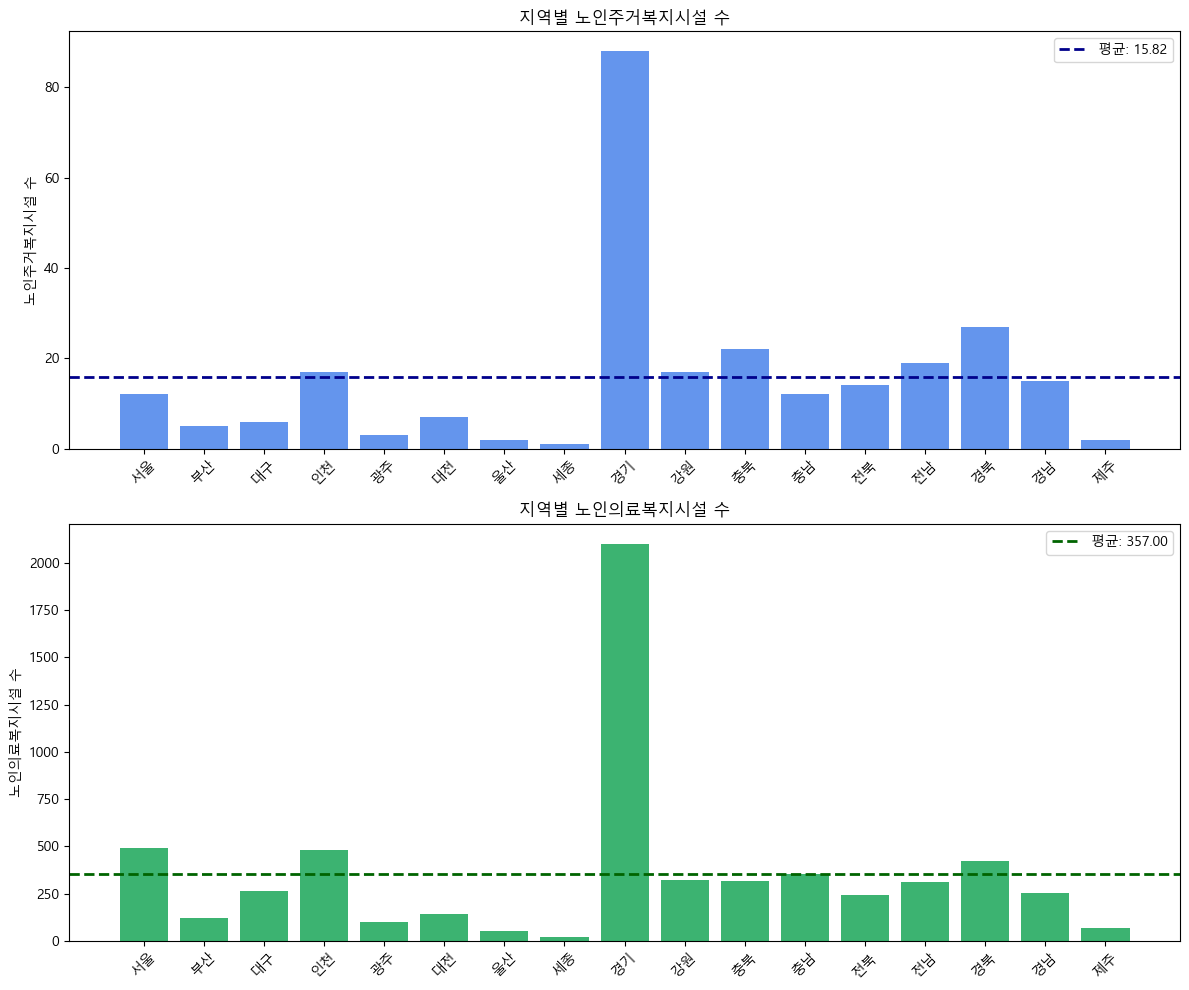

In [125]:
import matplotlib.pyplot as plt

# 데이터 변환
regions = [row[0] for row in inst_welfare_chd_2022[2:]]
residential = [int(row[1]) + int(row[4]) for row in inst_welfare_eld_2022[1:]]
medical = [int(row[7]) + int(row[10]) for row in inst_welfare_eld_2022[1:]]

# 평균 계산
avg_residential = sum(residential) / len(residential)
avg_medical = sum(medical) / len(medical)

# 서브플롯 생성
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# 노인주거복지시설 바 그래프
axes[0].bar(regions, residential, color='cornflowerblue')
axes[0].axhline(avg_residential, color='darkblue', linestyle='--', linewidth=2, label=f'평균: {avg_residential:.2f}')
axes[0].set_title('지역별 노인주거복지시설 수')
axes[0].set_ylabel('노인주거복지시설 수')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()

# 노인의료복지시설 바 그래프
axes[1].bar(regions, medical, color='mediumseagreen')
axes[1].axhline(avg_medical, color='darkgreen', linestyle='--', linewidth=2, label=f'평균: {avg_medical:.2f}')
axes[1].set_title('지역별 노인의료복지시설 수')
axes[1].set_ylabel('노인의료복지시설 수')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()


- 노인요양시설은 경기 지역에 가장 많고 세종 지역에 가장 적었습니다.
- 노인의료복지시설은 노인주거복지시설 수보다 약 20배 정도 많았습니다.

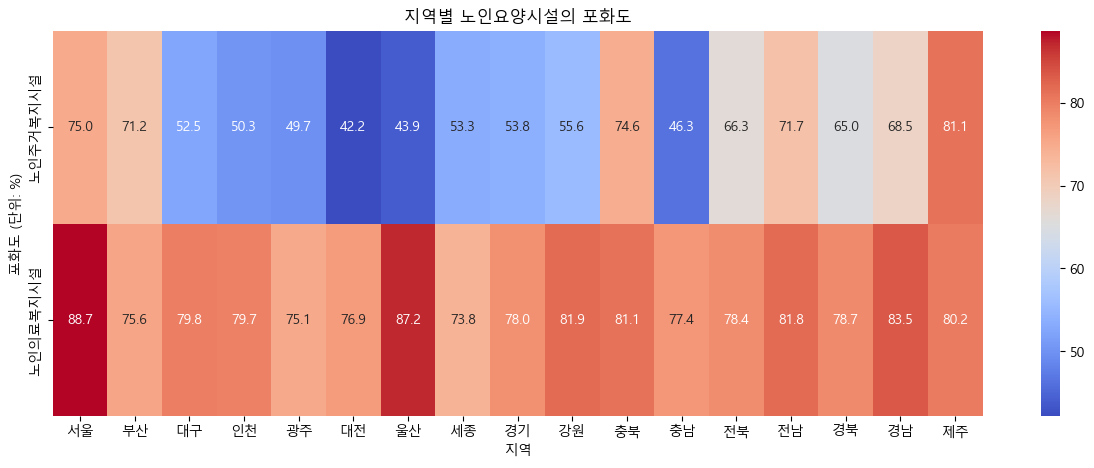

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 변환
regions = [row[0] for row in inst_welfare_chd_2022[2:]]
residential_capacity = [int(row[2]) + int(row[5]) for row in inst_welfare_eld_2022[1:]]
residential_current = [int(row[3]) + int(row[6]) for row in inst_welfare_eld_2022[1:]]
medical_capacity = [int(row[8]) + int(row[11]) for row in inst_welfare_eld_2022[1:]]
medical_current = [int(row[9]) + int(row[12]) for row in inst_welfare_eld_2022[1:]]

residential_pers = [(residential_current[i] / residential_capacity[i]) * 100 for i in range(len(residential_capacity))]
medical_pers = [(medical_current[i] / medical_capacity[i]) * 100 for i in range(len(medical_capacity))]

# 히트맵 데이터 생성
data = np.array([residential_pers, medical_pers])
labels = ['노인주거복지시설', '노인의료복지시설']

# 히트맵 그리기
fig, ax = plt.subplots(figsize=(15, 5))

sns.heatmap(data, annot=True, fmt=".1f", cmap="coolwarm", xticklabels=regions, yticklabels=labels, ax=ax)
ax.set_xlabel('지역')
ax.set_ylabel('포화도 (단위: %)')
ax.set_title('지역별 노인요양시설의 포화도')
plt.show()

- **포화도**는 각 항목의 정원 수 대비 입소자 수입니다.
- 노인주거복지시설의 포화도는 제주가 가장 높고 대전이 가장 낮았습니다.
- 노인의료복지시설의 포화도는 전반적으로 높게 나타났으며, 서울과 울산 지역이 특히 높았습니다.

### 3-5. plt.scatter()를 통한 65세 이상 노인 수와 노인주거복지시설 수 관계 시각화

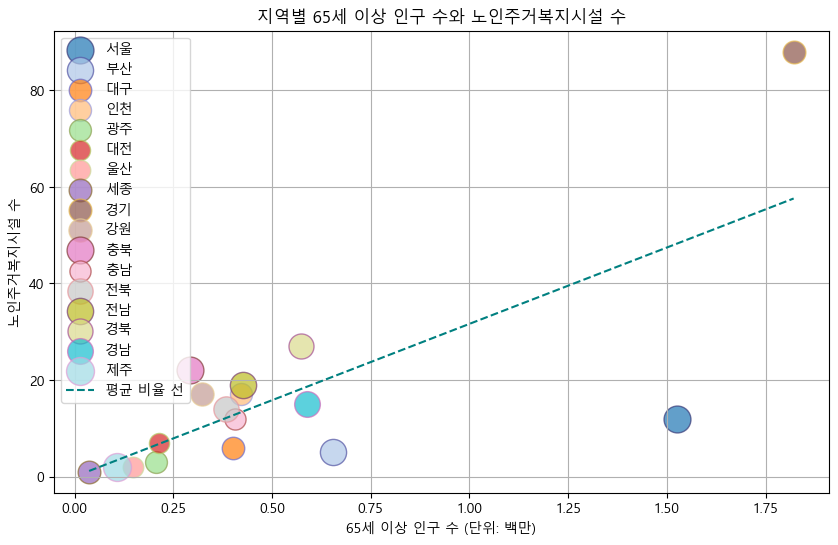

In [140]:
regions = [row[0] for row in inst_welfare_chd_2022[2:]]
residential = [int(row[1]) + int(row[4]) for row in inst_welfare_eld_2022[1:]]
population = [int(row[1]) / 1e6 for row in eld_2022[1:]]

# 색상 지정
face_colors = plt.cm.tab20(np.linspace(0, 1, len(regions)))
edge_colors = plt.cm.tab20b(np.linspace(0, 1, len(regions)))

# 산점도 그리기
plt.figure(figsize=(10, 6))
for i, region in enumerate(regions):
    plt.scatter(population[i], residential[i], color=face_colors[i], edgecolors=edge_colors[i], label=region, alpha=0.7, s=residential_pers[i] * 5)

# 평균 비율 계산
mean_ratio = np.mean([residential[i] / population[i] for i in range(len(regions))])
x_vals = np.linspace(min(population), max(population), 100)
y_vals = mean_ratio * x_vals
plt.plot(x_vals, y_vals, color='teal', linestyle='--', label='평균 비율 선')

plt.xlabel('65세 이상 인구 수 (단위: 백만)')
plt.ylabel('노인주거복지시설 수')
plt.title('지역별 65세 이상 인구 수와 노인주거복지시설 수')
plt.legend()
plt.grid(True)
plt.show()

- 이번엔 포화도에 따라 항목의 크기를 조정했습니다.
- 충북 지역의 경우 65세 이상 인구 수에 비해 노인주거복지시설 수가 상대적으로 많음에도 불구하고 포화도가 높게 나타났습니다.

### 3-6. plt.scatter()를 통한 65세 이상 노인 수와 노인의료복지시설 수 관계 시각화

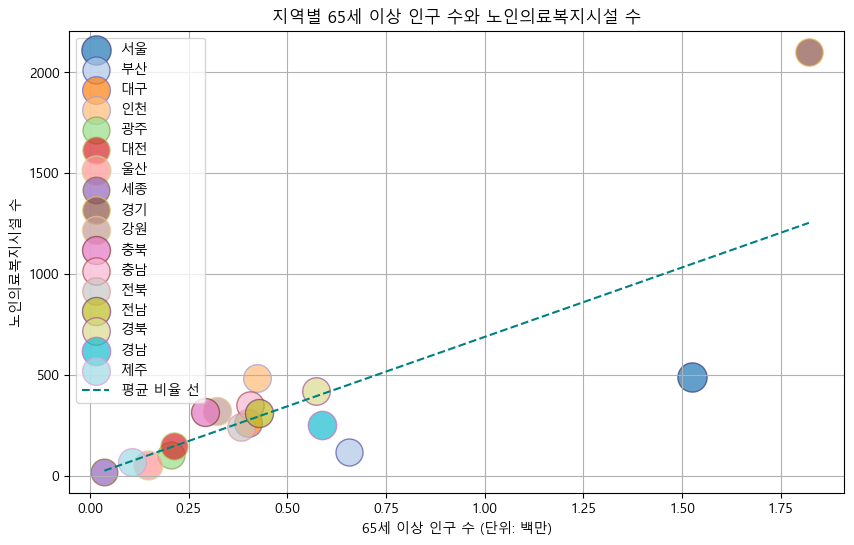

In [141]:
regions = [row[0] for row in inst_welfare_chd_2022[2:]]
medical = [int(row[7]) + int(row[10]) for row in inst_welfare_eld_2022[1:]]
population = [int(row[1]) / 1e6 for row in eld_2022[1:]]

# 색상 지정
face_colors = plt.cm.tab20(np.linspace(0, 1, len(regions)))
edge_colors = plt.cm.tab20b(np.linspace(0, 1, len(regions)))

# 산점도 그리기
plt.figure(figsize=(10, 6))
for i, region in enumerate(regions):
    plt.scatter(population[i], medical[i], color=face_colors[i], edgecolors=edge_colors[i], label=region, alpha=0.7, s=medical_pers[i] * 5)

# 평균 비율 계산
mean_ratio = np.mean([medical[i] / population[i] for i in range(len(regions))])
x_vals = np.linspace(min(population), max(population), 100)
y_vals = mean_ratio * x_vals
plt.plot(x_vals, y_vals, color='teal', linestyle='--', label='평균 비율 선')

plt.xlabel('65세 이상 인구 수 (단위: 백만)')
plt.ylabel('노인의료복지시설 수')
plt.title('지역별 65세 이상 인구 수와 노인의료복지시설 수')
plt.legend()
plt.grid(True)
plt.show()

- 히트맵에서 한번 보았던 것처럼 노인의료복지시설의 포화도는 전체적으로 높아서 항목의 크기 차이가 적은 모습입니다.
- 경기 지역은 65세 이상 인구 수에 비해 노인의료복지시설 수가 특히 많았습니다.

## 마치며

- 해당 분석을 통해 향후 복지시설의 입지 조건을 평가하는 데 유용한 근거가 될 수 있습니다.
- 이를 바탕으로, 지역별 특성과 인구 분포를 고려한 맞춤형 복지시설 배치가 필요합니다.
- 감사합니다.